# Uvodne navrhy na hypotezy

    * Ci inzinieri(technicky - technicky nie biomedical) najviac sadaju najviac k medikom - ak nie tak ku komu
    * Klasifikovat match medzi dvoma ludmi - na zaklade svojich preferencii a osobnosti druheho cloveka
    * Ci ludia so zalubou pre sport viac hladaju tiez sportovcov (TImova hypoteza - viac to riesia zeny)
    * Ci ludia beru aj menej inteligentnych partnerov ako su oni sami (intX in survey)



In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('Archive/Data.csv')

## Data preprocessing

In [42]:
personal_data = data[[
    'iid','gender',
    'age',
    'field',
    'field_cd',
    'race',
    'imprace',
    'imprelig',
    'from',
    'income',
    'goal',
    'date',
    'go_out',
    'career',
    'career_c',
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga',
    'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
    'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
    'you_call','them_cal',
    'date_3'
]]

personal_data.drop_duplicates(inplace=True)
personal_data = personal_data.rename(columns=
    {'attr1_1':'attr_pref',
     'sinc1_1':'sinc_pref',
     'intel1_1':'intel_pref',
     'fun1_1':'fun_pref',
     'amb1_1':'amb_pref',
     'shar1_1':'shar_pref',
     'attr3_1':'attr_me',
     'sinc3_1':'sinc_me',
     'intel3_1':'intel_me',
     'fun3_1':'fun_me',
     'amb3_1':'amb_me' 
    
    }
)


<ipython-input-42-0d6f6faa65a6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_data.drop_duplicates(inplace=True)


In [43]:
dating_data = data[[
    'iid','id','pid',
    'match',
    'int_corr',
    'dec_o',
    'dec',
    'like'    
]]

dating_data.drop_duplicates(inplace=True)
dating_data = dating_data.rename(columns=
    {
        'dec_o':'dec_partner',
        'like':'iid_like_pid'
    }
)


<ipython-input-43-e2670f4297f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dating_data.drop_duplicates(inplace=True)


In [44]:
dataset = dating_data.merge(personal_data,how='left',on='iid')
dataset = dataset.merge(personal_data,how='left',left_on='pid',right_on='iid',suffixes=['','_partners']) 

In [45]:
dataset.to_csv("dataset.csv")

Trochu som tymto upravil dataset, jednak som vyhodil stlpce ktore pravdepodobne nebudeme potrebovat. Ak ich budeme chcet staci ich sem doplnit a preto aj nehavam tento kod v tomto notebooku aby to bolo v jednej kope a rychlo sa k tomu dalo vratit. 

Zmenil som to ze som vytiahol o kazdom ucastniikovy randenia osobne informacie ktore ma rovnake v kazdom jeho riadku a tieto vytiahnute udaje som mergol k udajom o rande. Z tohto teda vznikla taka vec ze k datam o rande sa 2x namergovali osobne data pricom prvy clovek ktoreho je to oficialny riadok su data bez sufixu a partnerove data maju suffix _partners. Takisto som trochu veci premenoval ato tak ze vlasntosti ktore by som ja na dievcati chcel su oznacene ako attribut_pref a zasa tie ktore mam maju suffix _me.

# EDA

In [48]:
print(f'Number of records in dataset {len(dataset)}')

Number of records in dataset 8378


In [53]:
dataset['iid'].nunique()

551

In [55]:
a = dataset['iid'].nunique()
print(f'Number of attendents in dating { a }')

Number of attendents in dating 551


In [60]:
a = dataset['match'].sum()
len_ = len(dataset)
print(f'Number of matches in dating { a }, it is { round(a/len_*100,2) } %')

Number of matches in dating 1380, it is 16.47 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D437A19910>,
      dtype=object)

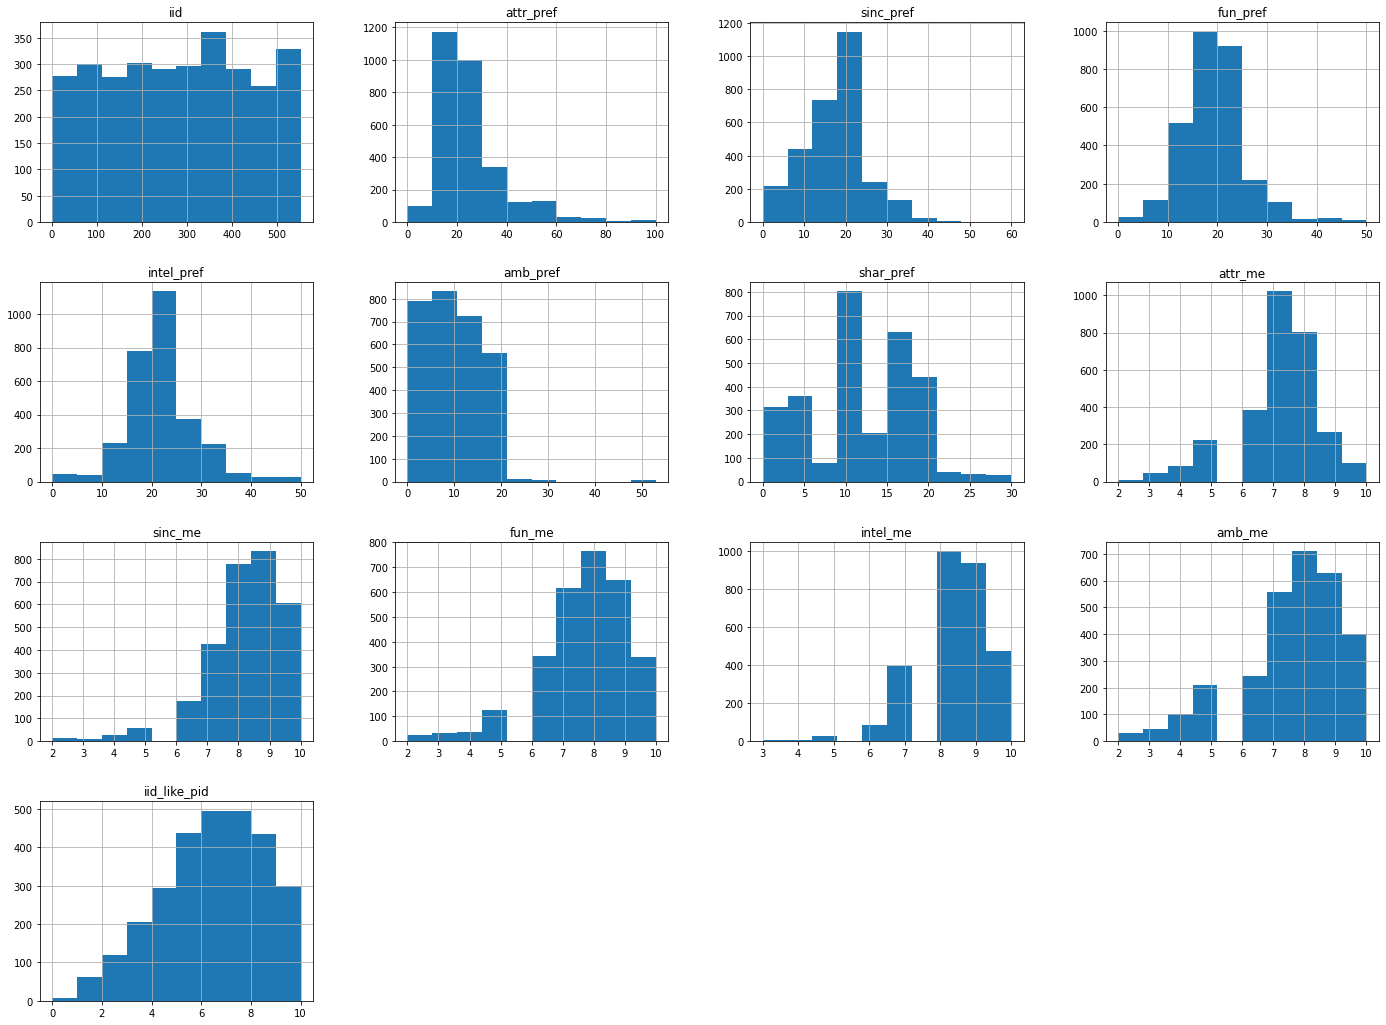

In [71]:
dataset[[ 'iid',
    'attr_pref','sinc_pref','fun_pref','intel_pref','amb_pref','shar_pref',
    'attr_me','sinc_me','fun_me','intel_me','amb_me','iid_like_pid'
        ]].drop_duplicates().hist(figsize=(24,18))

## Comparison features

In [84]:
dataset['attr_me_my_partner_diff'] = dataset['attr_me'] - dataset['attr_me_partners']
dataset['sinc_me_my_partner_diff'] = dataset['sinc_me'] - dataset['sinc_me_partners']
dataset['fun_me_my_partner_diff'] = dataset['fun_me'] - dataset['fun_me_partners']
dataset['intel_me_my_partner_diff'] = dataset['intel_me'] - dataset['intel_me_partners']
dataset['amb_me_my_partner_diff'] = dataset['amb_me'] - dataset['amb_me_partners']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4415665B0>,
      dtype=object)

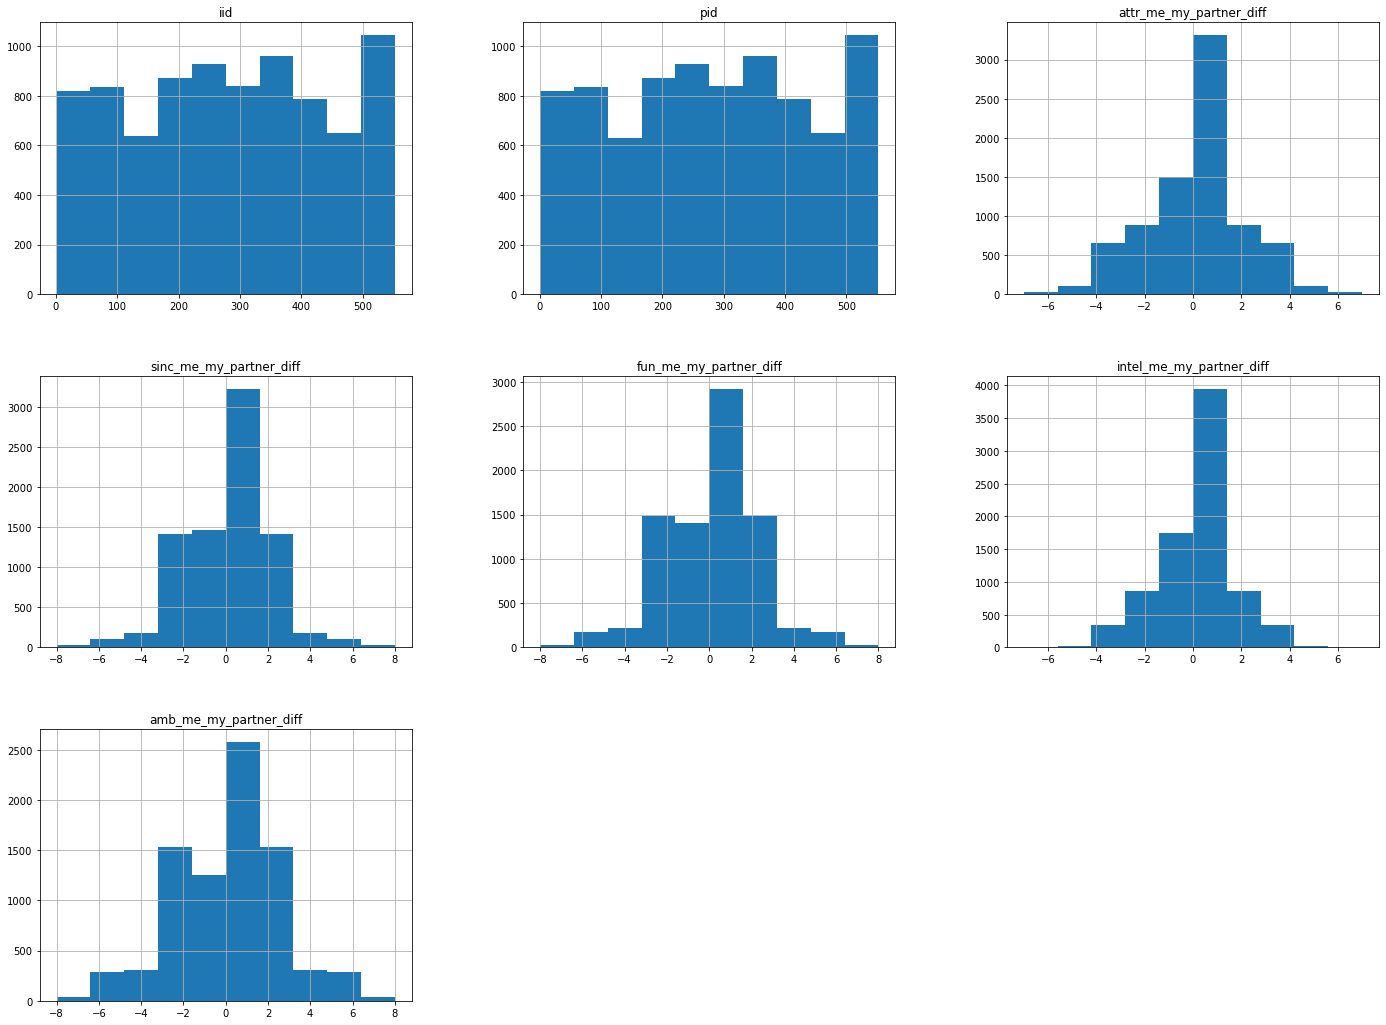

In [85]:
dataset[[ 'iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
        ]].drop_duplicates().hist(figsize=(24,18))

#### Match

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D43F2F9760>,
      dtype=object)

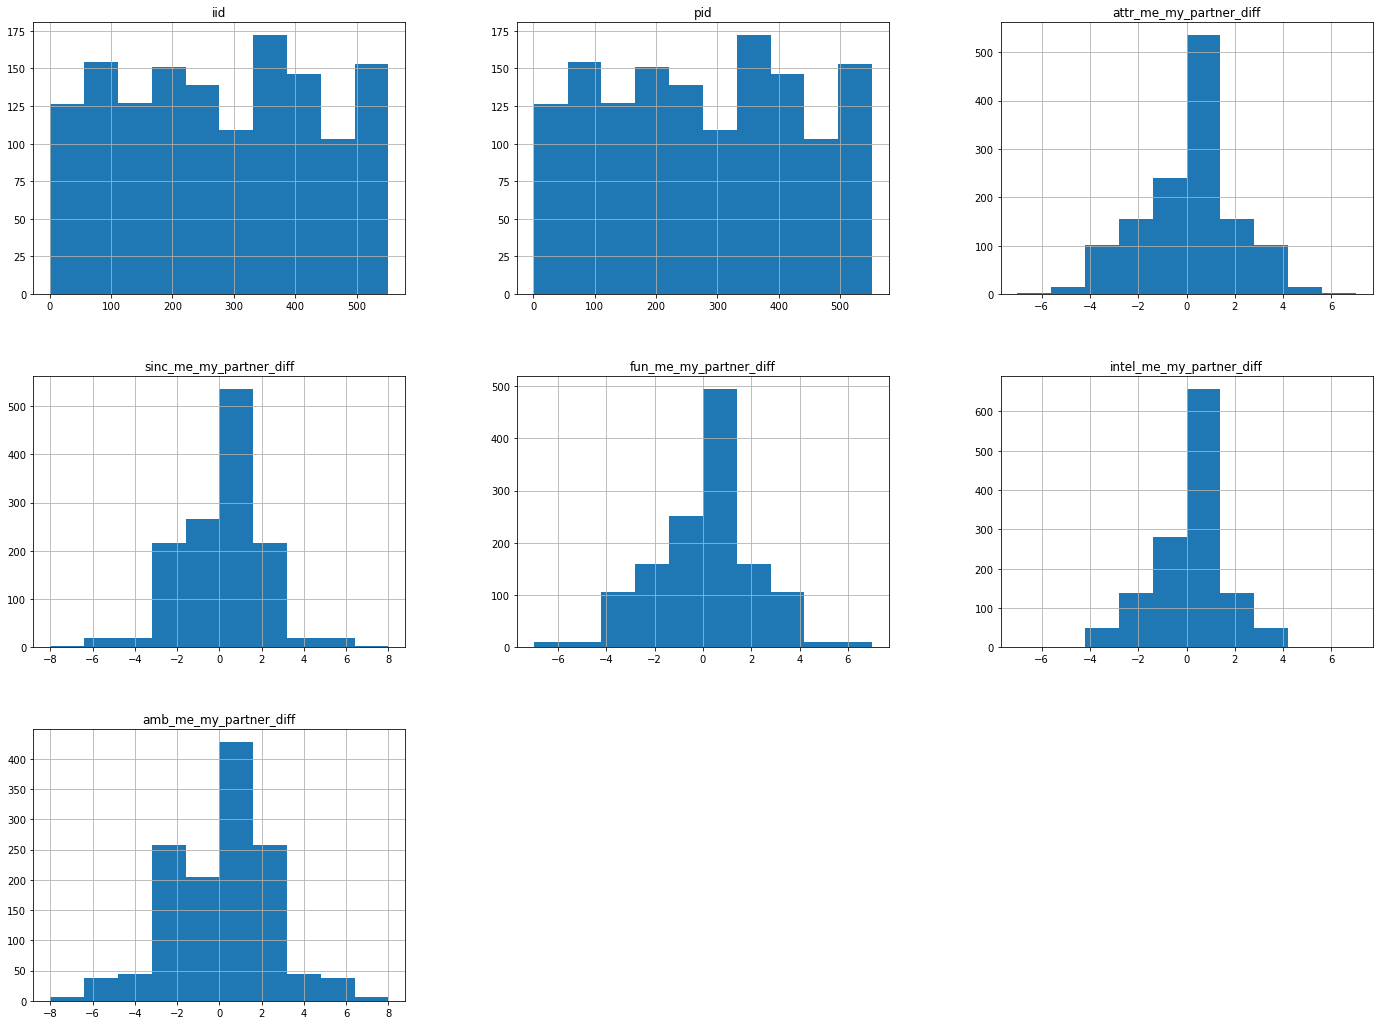

In [86]:
df_temp = dataset[dataset['match']==1]
df_temp[[ 'iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
        ]].drop_duplicates().hist(figsize=(24,18))

In [87]:
dataset['attr_me_pref_my_partner_pref_diff'] = dataset['attr_pref'] - dataset['attr_pref_partners']
dataset['sinc_me_pref_my_partner_pref_diff'] = dataset['sinc_pref'] - dataset['sinc_pref_partners']
dataset['fun_me_pref_my_partner_pref_diff'] = dataset['fun_pref'] - dataset['fun_pref_partners']
dataset['intel_me_pref_my_partner_pref_diff'] = dataset['intel_pref'] - dataset['intel_pref_partners']
dataset['amb_me_pref_my_partner_pref_diff'] = dataset['amb_pref'] - dataset['amb_pref_partners']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D441C89E20>,
      dtype=object)

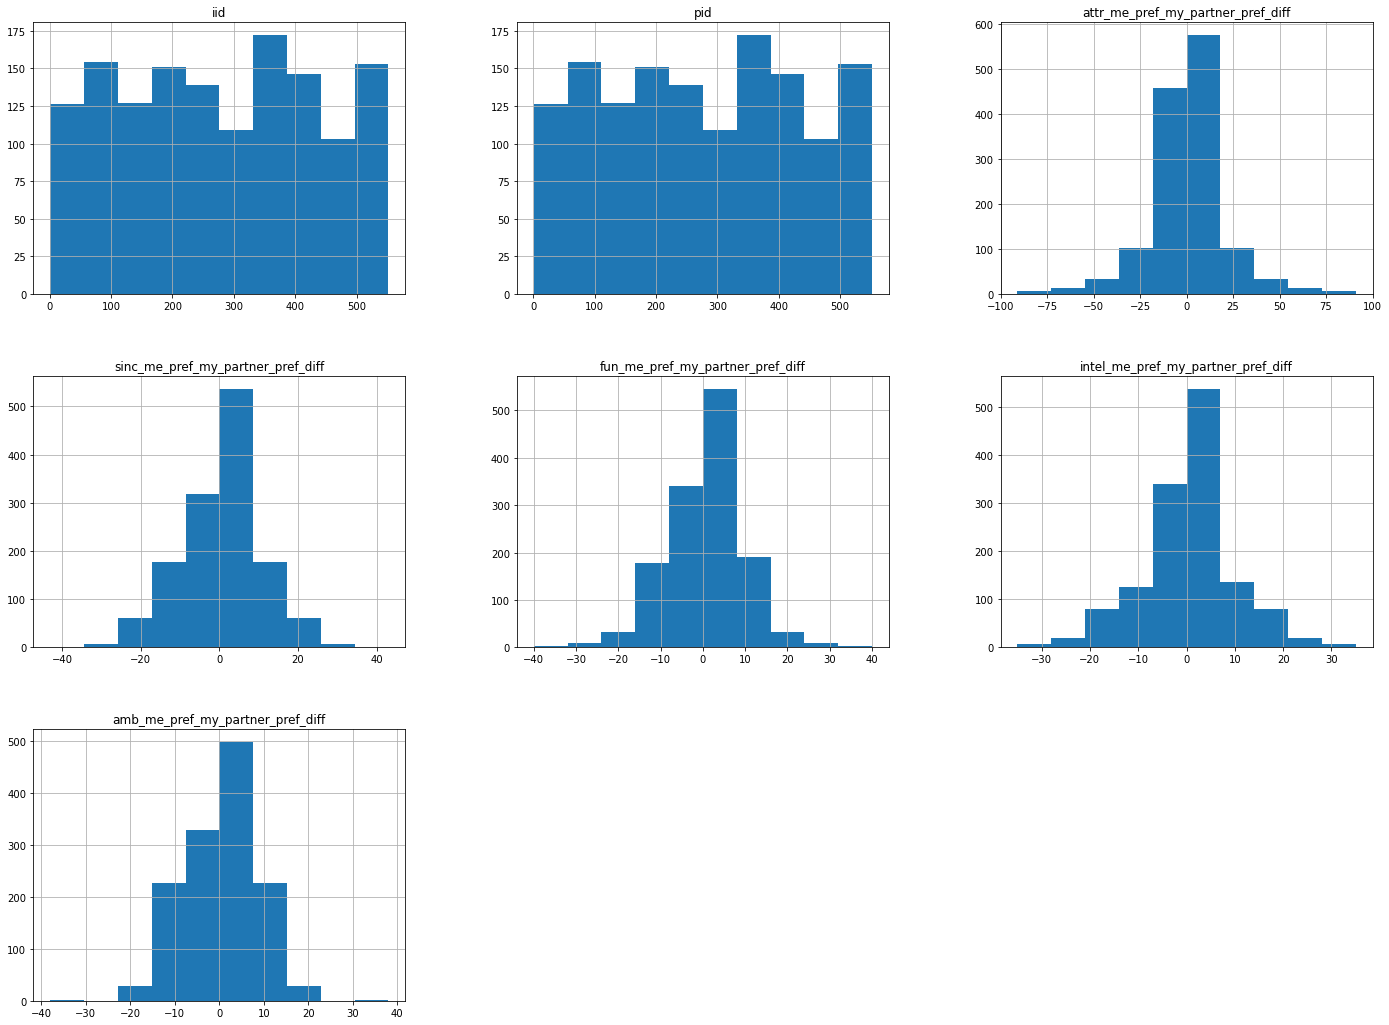

In [89]:
df_temp = dataset[dataset['match']==1]
df_temp[[ 'iid','pid',
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff','amb_me_pref_my_partner_pref_diff'
        ]].drop_duplicates().hist(figsize=(24,18))

### TODO - Lucynecka jednak ti prajem krasny cas ktory momentalne zazivas a ako si dobre hovorila na minulom calle tak by sa zislo dako zjednotit skaly 0-10 a 0-100 lebo takto moc nevieme porovnat ze aku frajerku by som chcel a akym som dal naozaj match podla ich schopnosti. Ono je to pruser lebo jedno hovori ze proste ako sa hodnotim a druhe ze co ma pre mna prioritu...

## Hobbies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D442006280>,
      dtype=object)

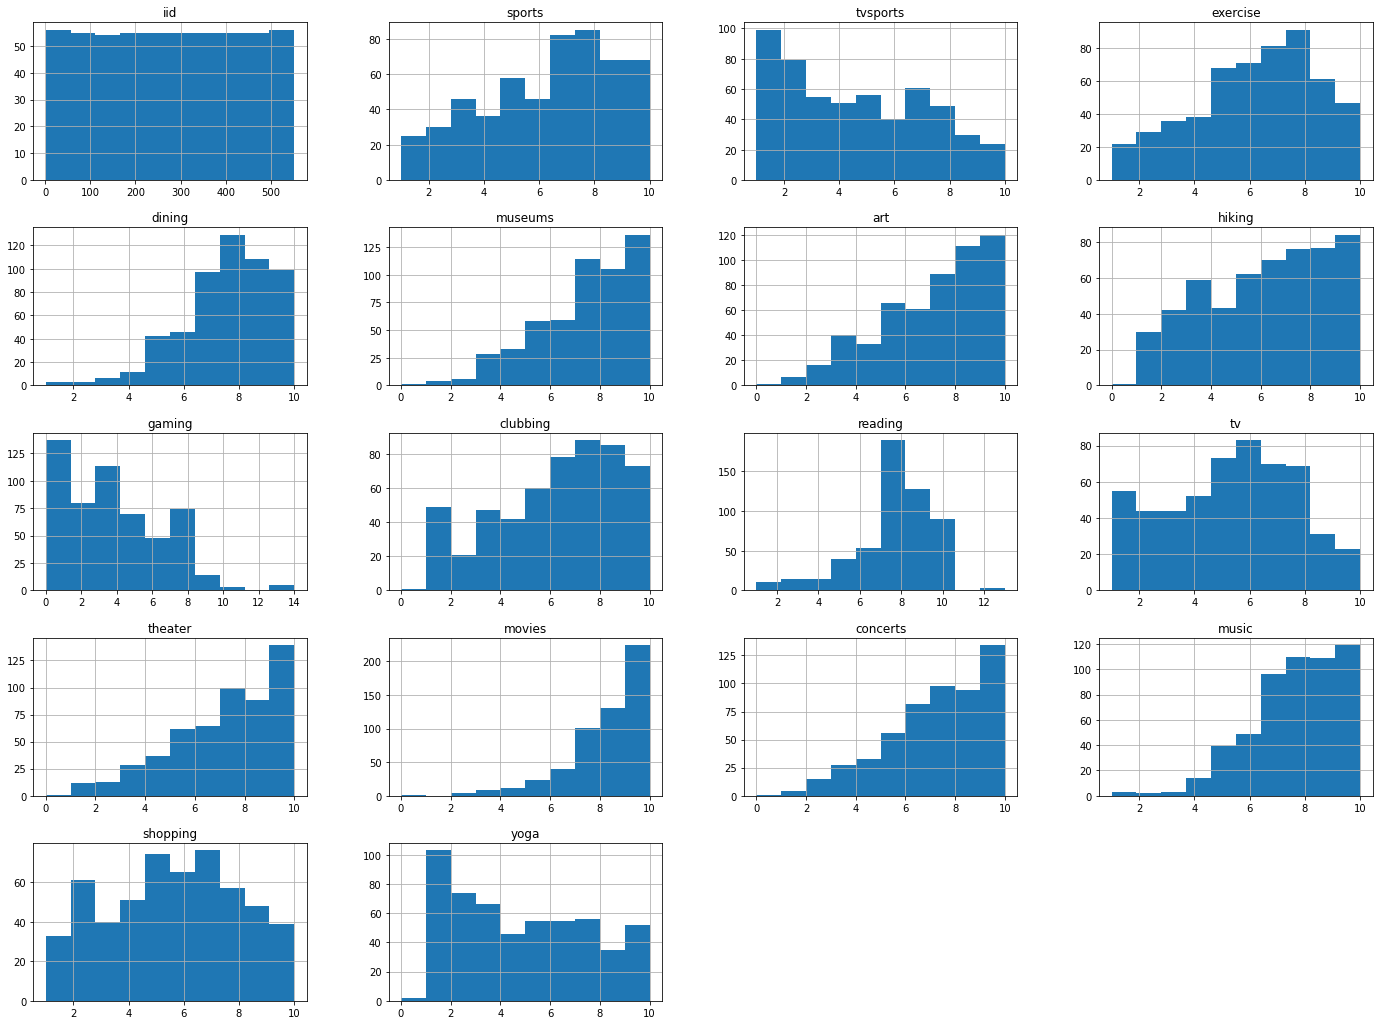

In [90]:
dataset[[ 'iid',
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
        ]].drop_duplicates().hist(figsize=(24,18))

In [92]:
dataset['sports_me_my_partner_diff'] = abs(dataset['sports'] - dataset['sports_partners'])
dataset['tvsports_me_my_partner_diff'] = abs(dataset['tvsports'] - dataset['tvsports_partners'])
dataset['exercise_me_my_partner_diff'] = abs(dataset['exercise'] - dataset['exercise_partners'])
dataset['dining_me_my_partner_diff'] = abs(dataset['dining'] - dataset['dining_partners'])
dataset['museums_me_my_partner_diff'] = abs(dataset['museums'] - dataset['museums_partners'])
dataset['art_me_my_partner_diff'] = abs(dataset['art'] - dataset['art_partners'])
dataset['hiking_me_my_partner_diff'] = abs(dataset['hiking'] - dataset['hiking_partners'])
dataset['gaming_me_my_partner_diff'] = abs(dataset['gaming'] - dataset['gaming_partners'])
dataset['clubbing_me_my_partner_diff'] = abs(dataset['clubbing'] - dataset['clubbing_partners'])
dataset['reading_me_my_partner_diff'] = abs(dataset['reading'] - dataset['reading_partners'])
dataset['tv_me_my_partner_diff'] = abs(dataset['tv'] - dataset['tv_partners'])
dataset['theater_me_my_partner_diff'] = abs(dataset['theater'] - dataset['theater_partners'])
dataset['movies_me_my_partner_diff'] = abs(dataset['movies'] - dataset['movies_partners'])
dataset['concerts_me_my_partner_diff'] = abs(dataset['concerts'] - dataset['concerts_partners'])
dataset['music_me_my_partner_diff'] = abs(dataset['music'] - dataset['music_partners'])
dataset['shopping_me_my_partner_diff'] = abs(dataset['shopping'] - dataset['shopping_partners'])
dataset['yoga_me_my_partner_diff'] = abs(dataset['yoga'] - dataset['yoga_partners'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D443994610>,
      dtype=object)

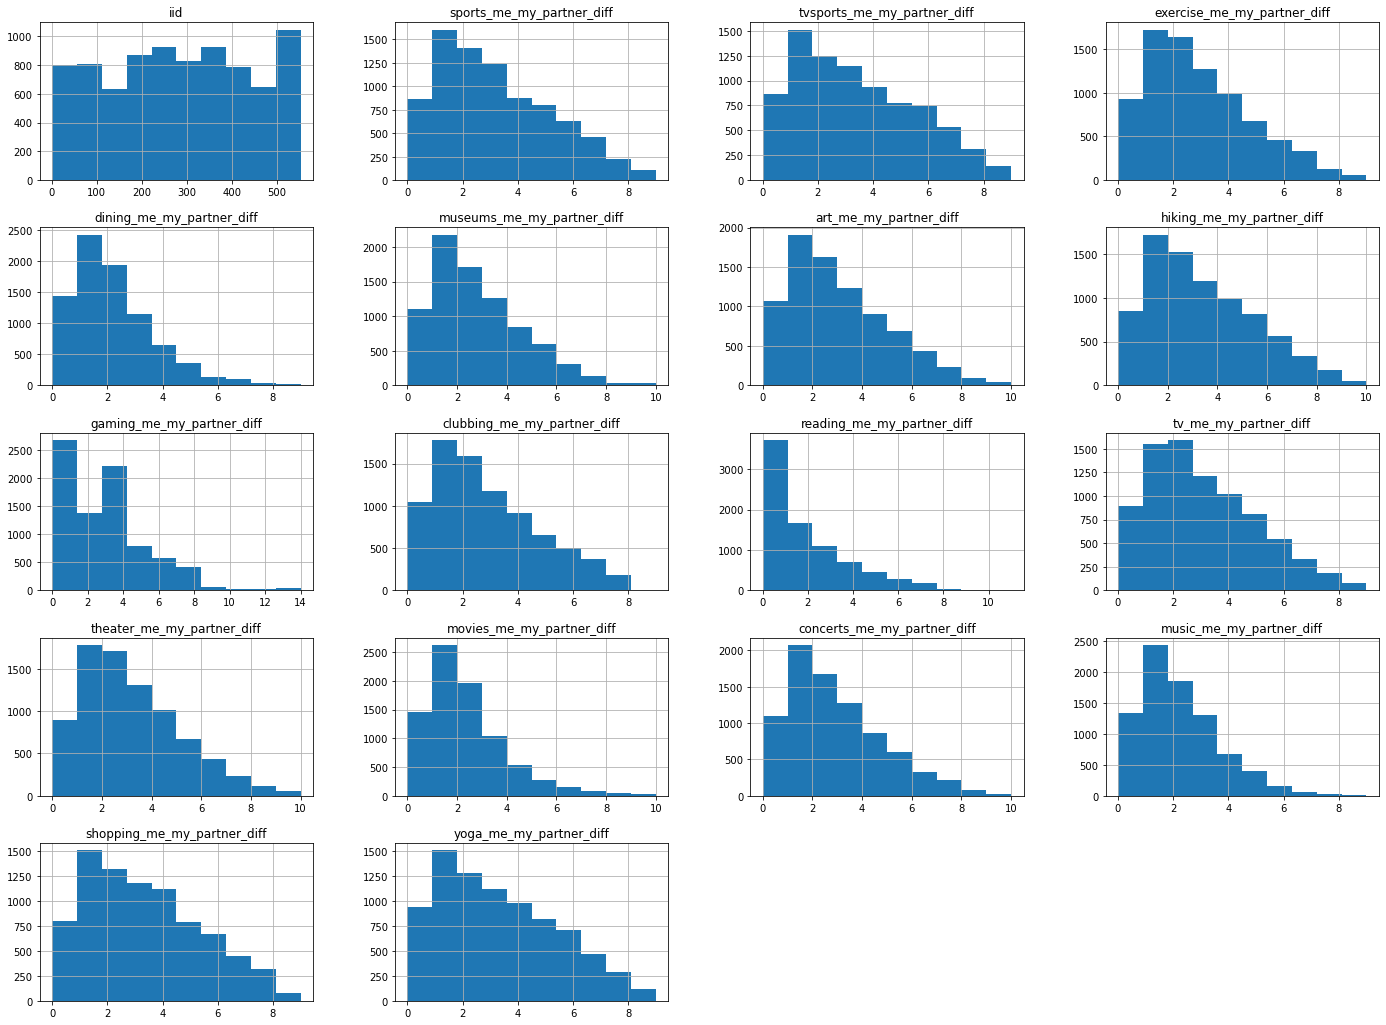

In [93]:
dataset[[ 'iid',
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
        ]].drop_duplicates().hist(figsize=(24,18))

In [94]:
dataset['sports_me_my_partner_diff'] = dataset['sports'] - dataset['sports_partners']
dataset['tvsports_me_my_partner_diff'] = dataset['tvsports'] - dataset['tvsports_partners']
dataset['exercise_me_my_partner_diff'] = dataset['exercise'] - dataset['exercise_partners']
dataset['dining_me_my_partner_diff'] = dataset['dining'] - dataset['dining_partners']
dataset['museums_me_my_partner_diff'] = dataset['museums'] - dataset['museums_partners']
dataset['art_me_my_partner_diff'] = dataset['art'] - dataset['art_partners']
dataset['hiking_me_my_partner_diff'] = dataset['hiking'] - dataset['hiking_partners']
dataset['gaming_me_my_partner_diff'] = dataset['gaming'] - dataset['gaming_partners']
dataset['clubbing_me_my_partner_diff'] = dataset['clubbing'] - dataset['clubbing_partners']
dataset['reading_me_my_partner_diff'] = dataset['reading'] - dataset['reading_partners']
dataset['tv_me_my_partner_diff'] = dataset['tv'] - dataset['tv_partners']
dataset['theater_me_my_partner_diff'] = dataset['theater'] - dataset['theater_partners']
dataset['movies_me_my_partner_diff'] = dataset['movies'] - dataset['movies_partners']
dataset['concerts_me_my_partner_diff'] = dataset['concerts'] - dataset['concerts_partners']
dataset['music_me_my_partner_diff'] = dataset['music'] - dataset['music_partners']
dataset['shopping_me_my_partner_diff'] = dataset['shopping'] - dataset['shopping_partners']
dataset['yoga_me_my_partner_diff'] = dataset['yoga'] - dataset['yoga_partners']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4473C38E0>,
      dtype=object)

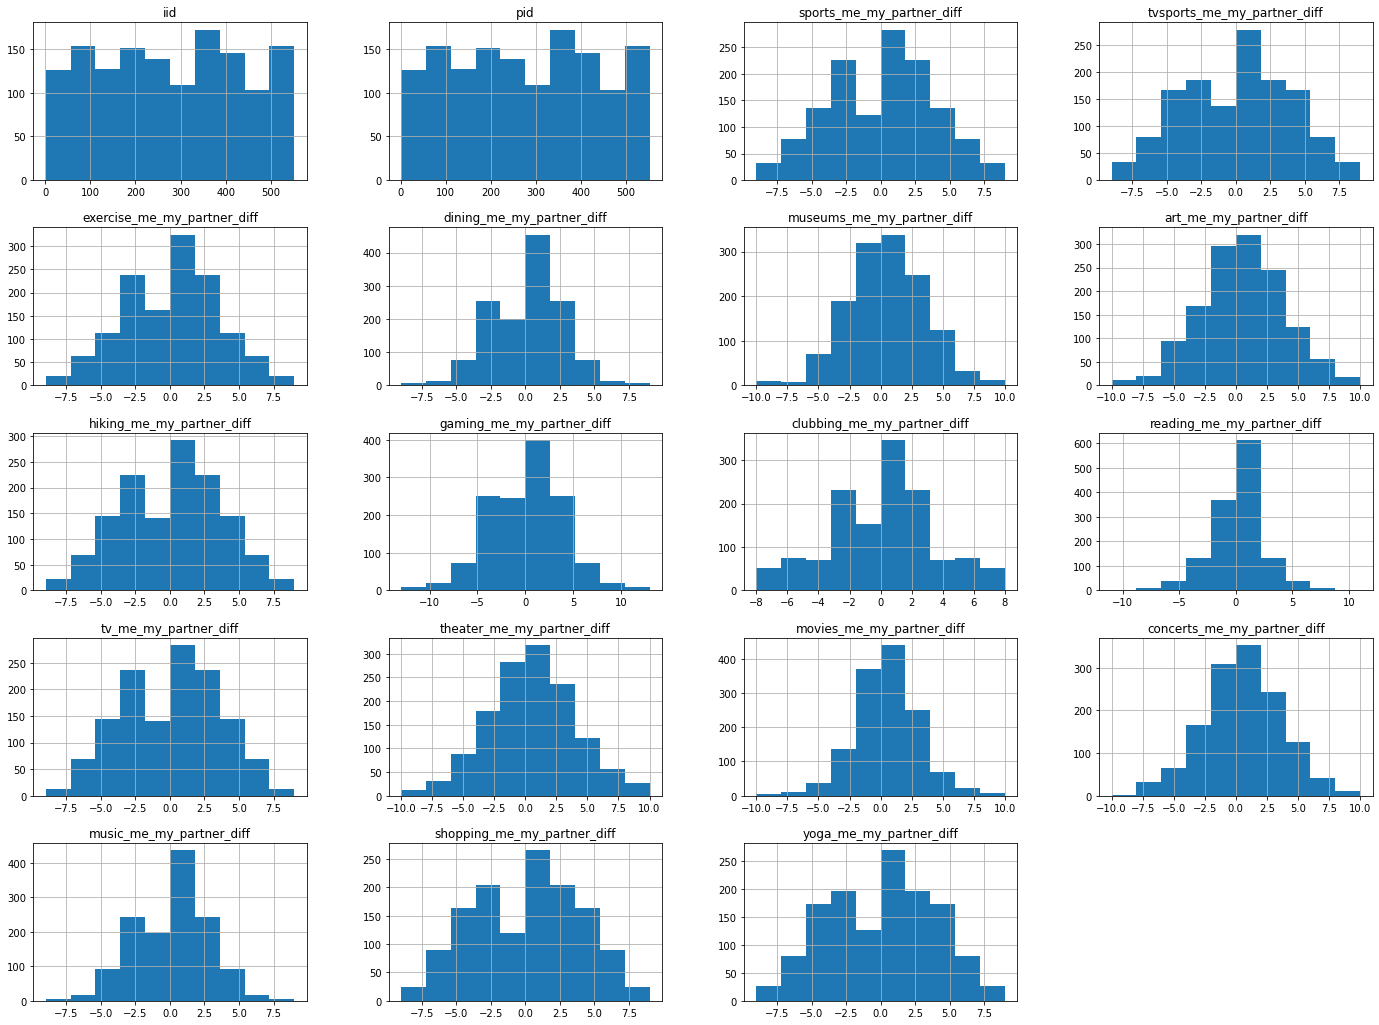

In [96]:
df_temp = dataset[dataset['match']==1]
df_temp[[ 'iid','pid',
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
        ]].drop_duplicates().hist(figsize=(24,18))

## Este mozno nejaka zakladna analyza profesii ??

## Povodne veci

In [25]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('enginee')]

index  field
30              engineering     46
46   electrical engineering     37
67   Biomedical engineering     22
137  biomedical engineering     18

In [30]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

index  field
26                                         medicine     52
33                           Biomedical Engineering     44
36                                         Medicine     40
67                           Biomedical engineering     22
71                           Biomedical Informatics     22
80                        medicine and biochemistry     21
85                              medical informatics     21
106                                     biomedicine     20
137                          biomedical engineering     18
207                            Art History/medicine     10
218                             Medical Informatics     10
220  Sociomedical Sciences- School of Public Health     10
252                          biomedical informatics      6

In [31]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['field_cd'].value_counts())
info = info.reset_index()
info

index  field_cd
0     8.0      1925
1    10.0       993
2     5.0       864
3    13.0       709
4     3.0       696
5     1.0       665
6     9.0       626
7    11.0       468
8     6.0       325
9     7.0       241
10    2.0       207
11   15.0       187
12    4.0       143
13   14.0       126
14   18.0        52
15   16.0        40
16   12.0        19
17   17.0        10

In [36]:
pd.set_option('display.max_rows', 500)
info = pd.DataFrame(data['career'].value_counts())
info = info.reset_index()
info[info['index'].str.contains('edic')]

index  career
36                                    Medicine      40
55                                    medicine      25
128  CEO in For Profit Biomedical Organization      20
221                           Medical Sciences      15
267             medical examiner or researcher      10

In [50]:
data['num_in_3'].value_counts()

1.0    430
0.0    159
2.0     61
4.0     18
Name: num_in_3, dtype: int64

### 2 hypoteza

Features ktore hovorim JA o sebe - attr3_1

Features ktore su MOJE preferencie - attr1_1

Features ktore hovori ta baba o mne ze som taky - attr_o

Features ktore hovoria o babynych preferenciach - pf_o_atr



In [55]:
uniq_person = data.drop_duplicates(subset=['iid'])


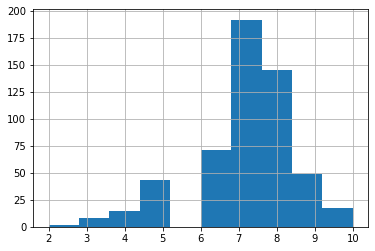

In [60]:
uniq_person['attr3_1'].hist()

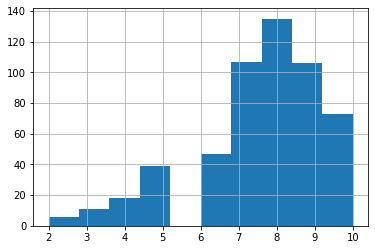

In [61]:
uniq_person['amb3_1'].hist()

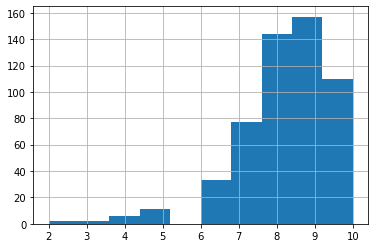

In [62]:
uniq_person['sinc3_1'].hist()

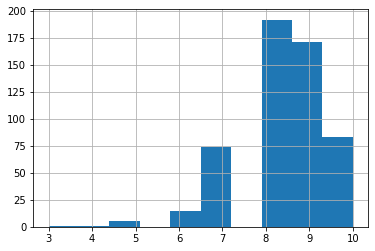

In [63]:
uniq_person['intel3_1'].hist()

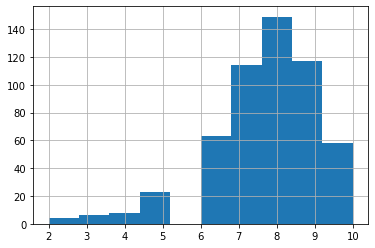

In [64]:
uniq_person['fun3_1'].hist()

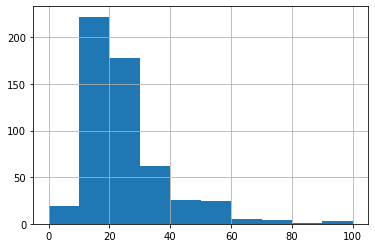

In [66]:
uniq_person['attr1_1'].hist()

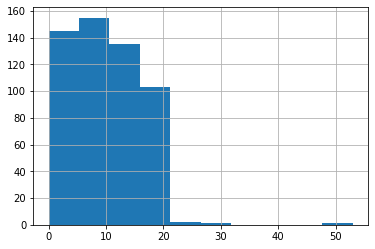

In [67]:
uniq_person['amb1_1'].hist()

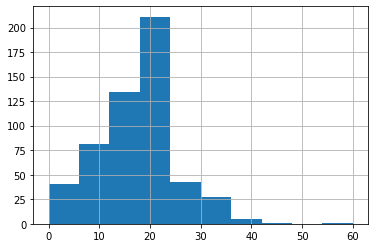

In [71]:
uniq_person['sinc1_1'].hist()

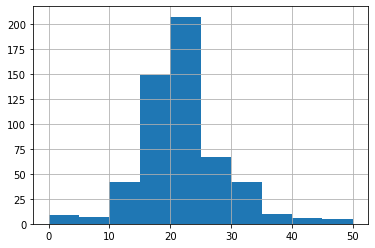

In [69]:
uniq_person['intel1_1'].hist()

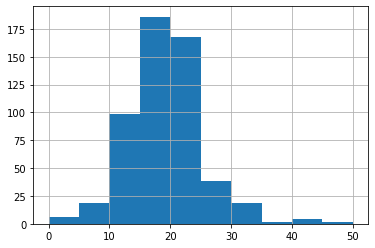

In [70]:
uniq_person['fun1_1'].hist()

##### vlastnosti 2 cloveka su vetsie ako moje ocakavania a zaroven je tam match

In [95]:
my_intel = data[['iid','intel3_1','dec','pid']]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1
0       1   11.0            0               8.0    1       8.0
1       1   11.0            0               8.0    1       8.0
2       1   11.0            0               8.0    1       8.0
3       1   11.0            0               8.0    1       8.0
4       1   11.0            0               8.0    1       8.0
...   ...    ...          ...               ...  ...       ...
8409  552  509.0            1               8.0    1       7.0
8410  552  509.0            0               8.0    1       7.0
8411  552  509.0            1               8.0    1       7.0
8412  552  509.0            0               8.0    1       7.0
8413  552  509.0            1               8.0    1       7.0

[1921 rows x 6 columns]

In [96]:
data_intel[data_intel['dec'] == 1]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1
0       1   11.0            0               8.0    1       8.0
1       1   11.0            0               8.0    1       8.0
2       1   11.0            0               8.0    1       8.0
3       1   11.0            0               8.0    1       8.0
4       1   11.0            0               8.0    1       8.0
...   ...    ...          ...               ...  ...       ...
8409  552  509.0            1               8.0    1       7.0
8410  552  509.0            0               8.0    1       7.0
8411  552  509.0            1               8.0    1       7.0
8412  552  509.0            0               8.0    1       7.0
8413  552  509.0            1               8.0    1       7.0

[3159 rows x 6 columns]

##### Iba zeny

In [101]:
my_intel = data[['iid','intel3_1','dec','pid','gender']]
my_intel = my_intel[my_intel['gender'] == 1]


data_persons = data.drop_duplicates(subset=['iid'])
data_intel = data_persons.merge(my_intel,how='inner',left_on='pid',right_on='iid', suffixes=['','_partner'])
data_intel = data_intel[['iid','pid','dec_partner','intel3_1_partner','dec','intel3_1','gender','gender_partner']]

data_intel[(
        data_intel['intel3_1_partner'] >= data_intel['intel3_1']
    ) & ( data_intel['dec'] == 1 )]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1  gender  \
0       1   11.0            0               8.0    1       8.0       0   
1       1   11.0            0               8.0    1       8.0       0   
2       1   11.0            0               8.0    1       8.0       0   
3       1   11.0            0               8.0    1       8.0       0   
4       1   11.0            0               8.0    1       8.0       0   
...   ...    ...          ...               ...  ...       ...     ...   
4210  530  531.0            0              10.0    1       9.0       0   
4211  530  531.0            0              10.0    1       9.0       0   
4212  530  531.0            0              10.0    1       9.0       0   
4213  530  531.0            0              10.0    1       9.0       0   
4214  530  531.0            0              10.0    1       9.0       0   

      gender_partner  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4210               1  
4211               1  
4212               1  
4213               1  
4214               1  

[800 rows x 8 columns]

In [102]:
data_intel[data_intel['dec'] == 1]

iid    pid  dec_partner  intel3_1_partner  dec  intel3_1  gender  \
0       1   11.0            0               8.0    1       8.0       0   
1       1   11.0            0               8.0    1       8.0       0   
2       1   11.0            0               8.0    1       8.0       0   
3       1   11.0            0               8.0    1       8.0       0   
4       1   11.0            0               8.0    1       8.0       0   
...   ...    ...          ...               ...  ...       ...     ...   
4210  530  531.0            0              10.0    1       9.0       0   
4211  530  531.0            0              10.0    1       9.0       0   
4212  530  531.0            0              10.0    1       9.0       0   
4213  530  531.0            0              10.0    1       9.0       0   
4214  530  531.0            0              10.0    1       9.0       0   

      gender_partner  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4210               1  
4211               1  
4212               1  
4213               1  
4214               1  

[1161 rows x 8 columns]

todo

- pozriet ostatne hypotezy
- dokoncit znenie hypotezy o inteligencii